In [1]:
# include("./DroneLibV2.jl")
include("./ReinforceDDPGDroneLib.jl")

run_model (generic function with 2 methods)

In [2]:
# Initialize environment
state_dim = 12 + 3 + 4
action_dim = 4
MAX_ACTION = 14000.0

max_action = convert(Float64, MAX_ACTION)

noise = OUNoise(action_dim)

OUNoise([0.0, 0.0, 0.0, 0.0], 0.15, 0.0, 0.2)

drone crashed
Episode reward: -26474.43978580843 Number of steps: 1647
Float32[-0.3929367, -1.1544406, 0.0, -0.3313516, -1.1816233, 0.0, -2.579338, -3.1107488, 2.973713, -1.4390479, -2.299008, 2.6105597][542.2907709873737, 1011.2623610936225, 58.21991614462151, 485.633789027427]


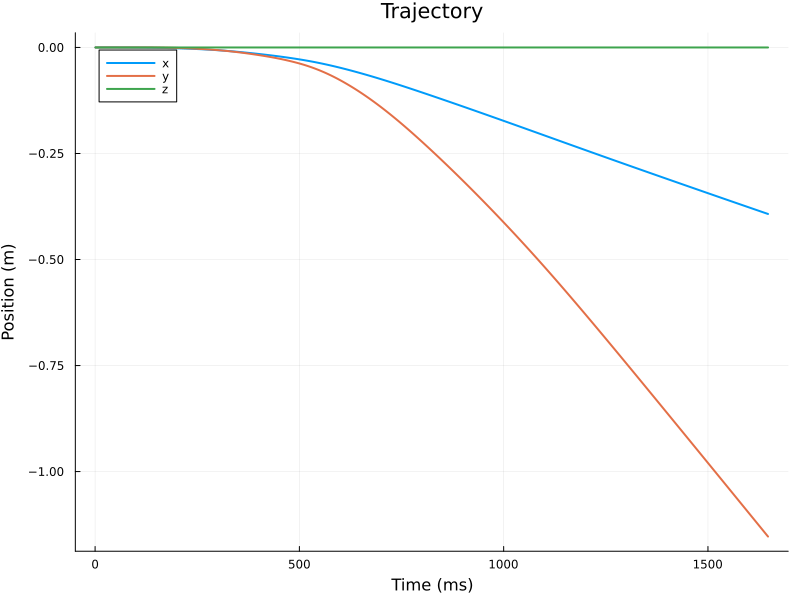

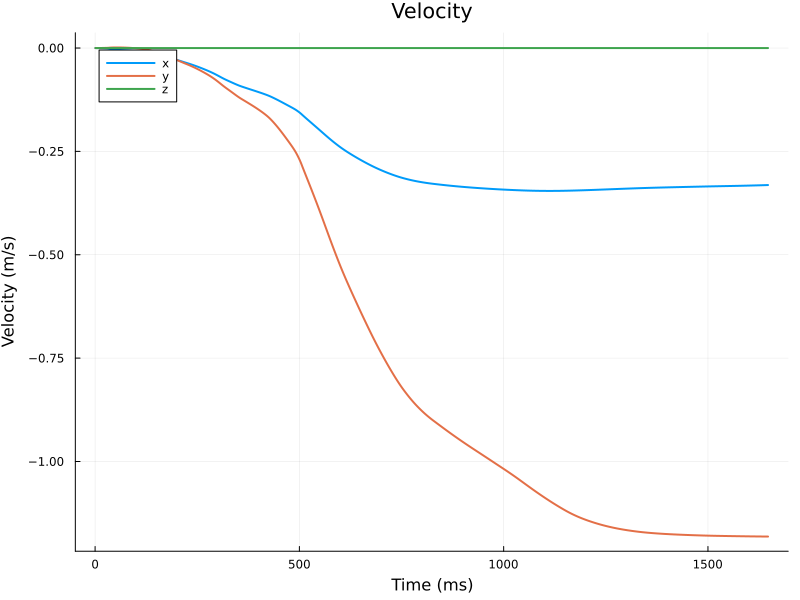

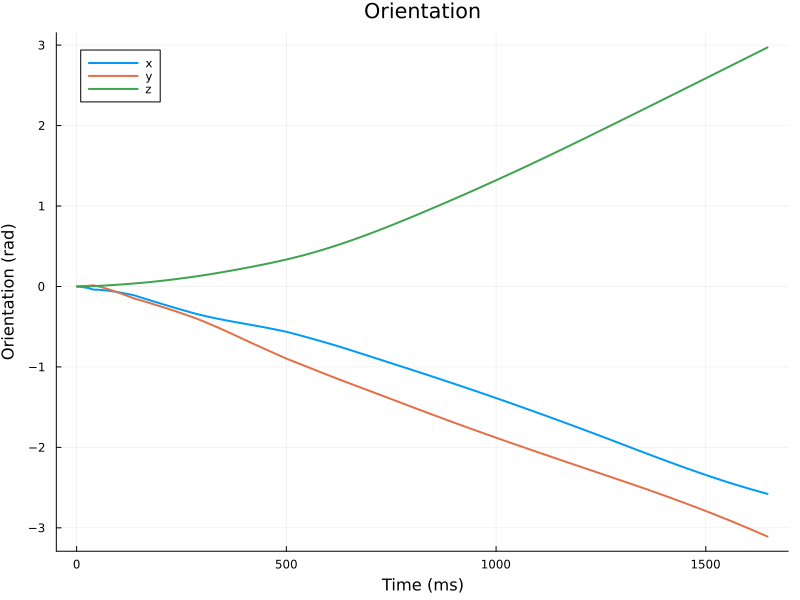

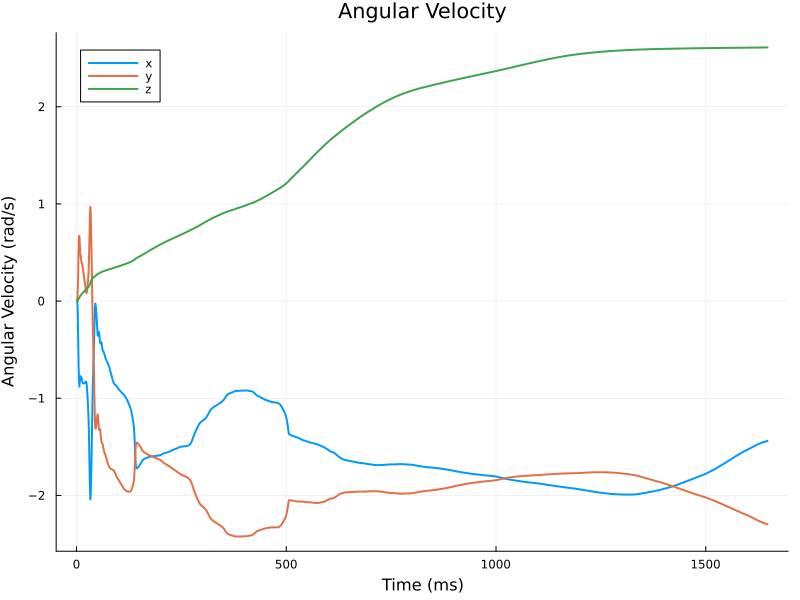

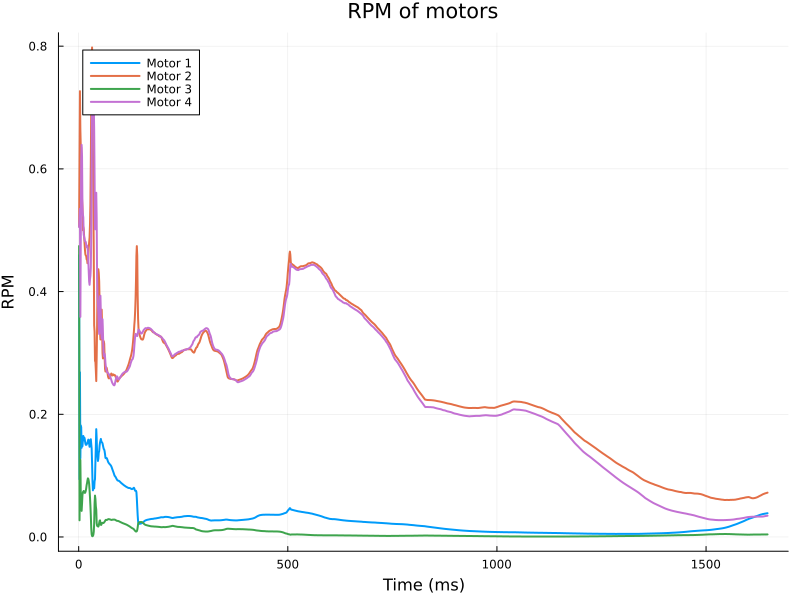

In [10]:
agent = DDPGAgent(state_dim, action_dim, max_action, "agent_critic_model_1.bson", "agent_actor_model_1.bson")

model_env = DroneEnv([0.0, 0.0, 1.0], 2.0)
state_spaces, motors_rpm = run_model(agent, model_env, false)
# state_spaces, motors_rpm = run_model(agent, model_env, true)
println(get_state(model_env.drone), model_env.action)
plotStateSpaces(state_spaces)
plotMotorRpms(motors_rpm)
# println(get_state(model_env.drone), model_env.action)
# plotStateSpaces(state_spaces, 1000, true, "results", "ddpg_1")
# plotMotorRpms(motors_rpm, 1000, true, "results", "ddpg_1")
# du = NonLinearDroneDynamics!(get_state(model_env.drone), [0.0, 14000.0, 14000.0, 0.0], 1 / frequency)
# abs(model_env.drone.orientation[1]) > pi || abs(model_env.drone.orientation[2]) > pi

In [11]:
motors_rpm[end]

4-element Vector{Float64}:
 0.03873505507052669
 0.07223302579240161
 0.004158565438901536
 0.034688127787673356

In [ ]:
action = [0.0, 14000.0, 14000.0, 0.0]
action = convert(CuArray{Float64}, action)
step!(model_env, action)
println(get_state(model_env.drone))


In [ ]:
norm(model_env.action)

In [ ]:
# 2223.8812148571014
# 547.933466732502
# 681.3510209321976
# 1113.097071647644

state = get_normalised_state(model_env.drone)
addParamterNoise!(agent, 0.001)
action = get_action(agent, model_env.action, model_env.target_position, state)

In [ ]:
sum([[1, 2, 3], [4, 5, 6]], dims=2)